<a href="https://colab.research.google.com/github/sureshakukkaje/Python/blob/master/Deep_Learning_mnist_test_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Check Python Version
import sys
sys.version
sys.version_info
import platform
print(platform.python_version())

'3.6.8 (default, Jan 14 2019, 11:02:34) \n[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]'

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)

3.6.8


In [25]:
# Check Keras and Tensorflow environment
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
# tensorflow
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)

tensorflow: 1.14.0
keras: 2.2.5


In [0]:
# import libaries
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, LSTM, Dropout, advanced_activations
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,recall_score,precision_score,accuracy_score,f1_score
%matplotlib inline

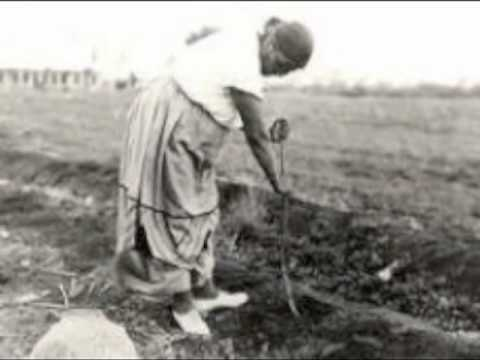

In [28]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
 
# What this case is all about?
from IPython.display import YouTubeVideo
YouTubeVideo("pN4HqWRybwk")

In [118]:
# Import data
df = pd.read_csv('mnist_test.csv')
 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
 
# Investigate Data
type(df)
df.size
df.shape
df.head()
df.tail()

pandas.core.frame.DataFrame

7850000

(10000, 785)

pixel0  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  label
0       0       0       0       0  ...         0         0         0      8
1       0       0       0       0  ...         0         0         0      3
2       0       0       0       0  ...         0         0         0      8
3       0       0       0       0  ...         0         0         0      0
4       0       0       0       0  ...         0         0         0      1

[5 rows x 785 columns]

pixel0  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  label
9995       0       0       0       0  ...         0         0         0      9
9996       0       0       0       0  ...         0         0         0      0
9997       0       0       0       0  ...         0         0         0      4
9998       0       0       0       0  ...         0         0         0      8
9999       0       0       0       0  ...         0         0         0      4

[5 rows x 785 columns]

In [51]:
print ('Overall data summary')
df.describe()

Overall data summary


pixel0   pixel1   pixel2  ...  pixel782  pixel783         label
count  10000.0  10000.0  10000.0  ...   10000.0   10000.0  10000.000000
mean       0.0      0.0      0.0  ...       0.0       0.0      4.443400
std        0.0      0.0      0.0  ...       0.0       0.0      2.895865
min        0.0      0.0      0.0  ...       0.0       0.0      0.000000
25%        0.0      0.0      0.0  ...       0.0       0.0      2.000000
50%        0.0      0.0      0.0  ...       0.0       0.0      4.000000
75%        0.0      0.0      0.0  ...       0.0       0.0      7.000000
max        0.0      0.0      0.0  ...       0.0       0.0      9.000000

[8 rows x 785 columns]

In [52]:
print ('Counts of Labels')
df.groupby("label").size()

Counts of Labels


label
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
dtype: int64

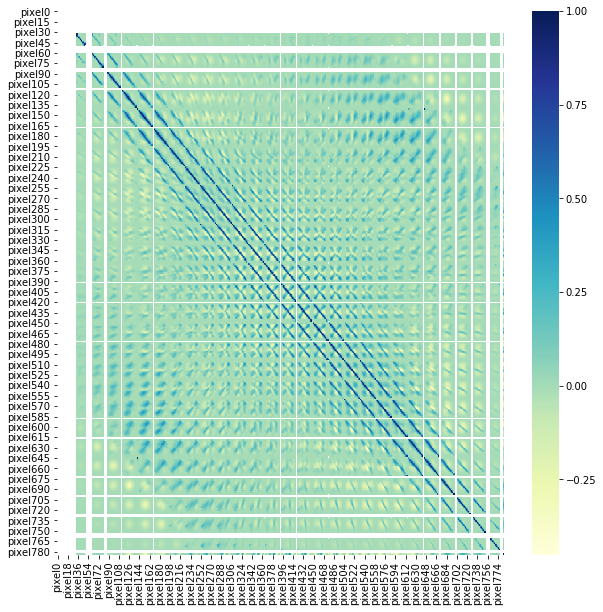

In [120]:
# Variables correlations
x = df.corr()
x
plt.subplots(figsize=(10,10))
sns.heatmap(x,cmap="YlGnBu")
plt.show();

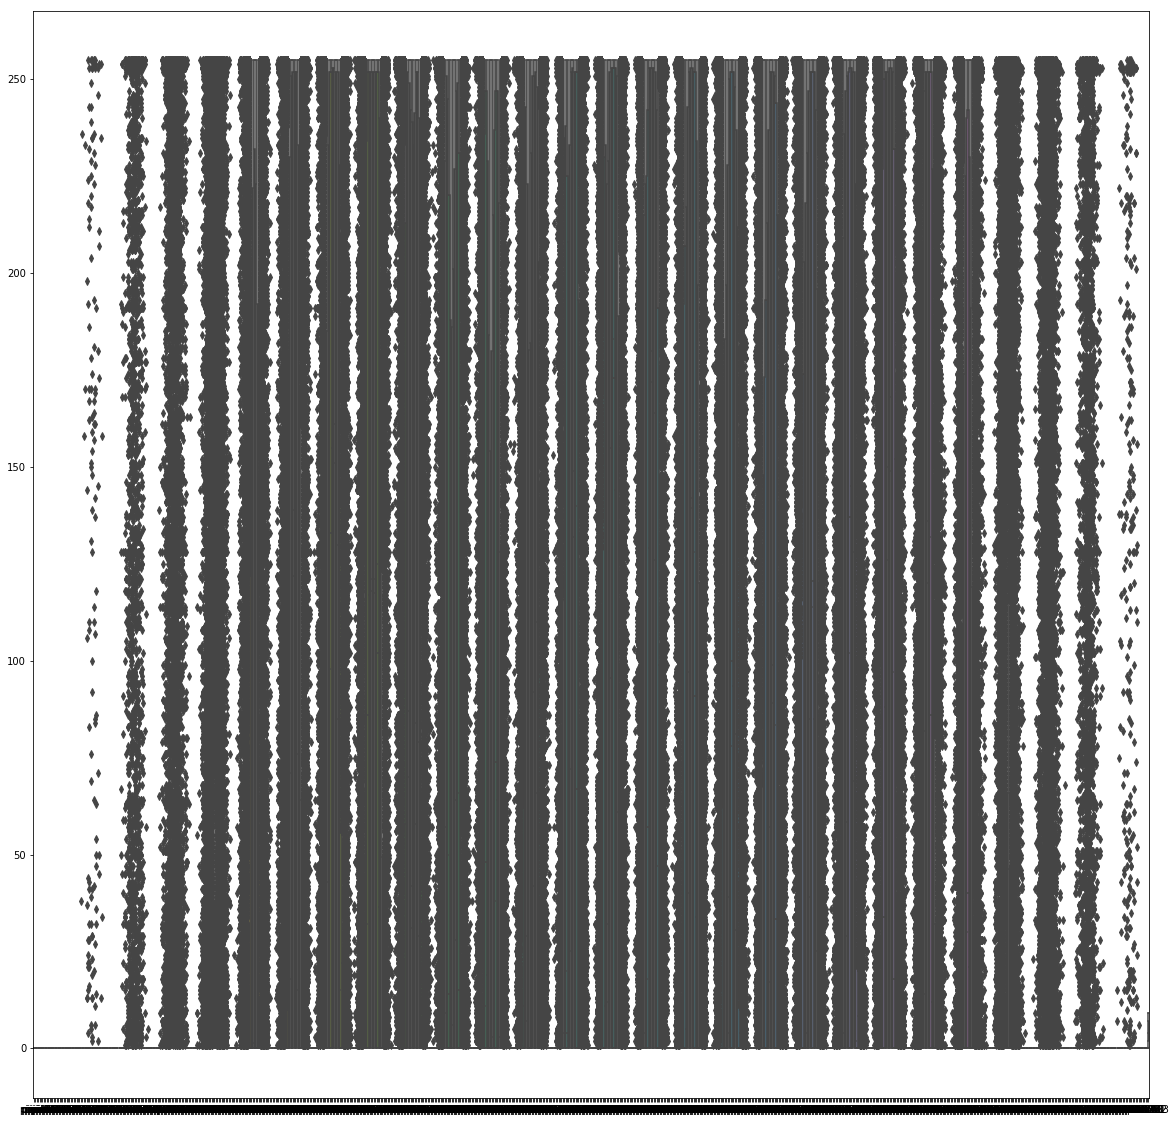

In [54]:
plt.subplots(figsize=(20,20))
sns.boxplot(data=df)
plt.show();

In [116]:
train = df.sample(8000, random_state = 1, replace = False)
train.head()
test = df.sample(2000, random_state = 2, replace = False)
test.head()

pixel0  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  label
9953       0       0       0       0  ...         0         0         0      3
3850       0       0       0       0  ...         0         0         0      6
4962       0       0       0       0  ...         0         0         0      6
3886       0       0       0       0  ...         0         0         0      3
5437       0       0       0       0  ...         0         0         0      7

[5 rows x 785 columns]

pixel0  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  label
7878       0       0       0       0  ...         0         0         0      9
3224       0       0       0       0  ...         0         0         0      0
1919       0       0       0       0  ...         0         0         0      6
4432       0       0       0       0  ...         0         0         0      6
4835       0       0       0       0  ...         0         0         0      3

[5 rows x 785 columns]

In [111]:
Y = df.iloc[:,-1]
Y.shape

(10000,)

In [112]:
X = df.iloc[:,0:-1]
X.shape

(10000, 784)

In [102]:
# Create Features and Labels and Standardize data
Y = df.iloc[:,-1]
X= df.iloc[:,0:-1]
std = StandardScaler()
X_Features= std.fit_transform(X)
# Create train and test data 75% and 25% split
train_x, test_x, train_y, test_y = train_test_split(X_Features, Y, test_size=0.25, random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)

(7500, 784)

(2500, 784)

(7500,)

(2500,)

numpy.ndarray

In [0]:
test_y = keras.utils.to_categorical(test_y, 10)
train_y = keras.utils.to_categorical(train_y, 10)

In [0]:
# Build Deep Learning Model
model = Sequential()
model.add(Dense(512, input_dim =784))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
 
train_x = np.array(train_x)
train_y = np.array(train_y)

In [137]:
# evaluate the model
scores = model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2500/2500 [==============================] - 1s 572us/step

acc: 51.45%


In [138]:
# Fit the model

model.fit(train_x,train_y, epochs=10, batch_size=64)

Epoch 1/10
7500/7500 [==============================] - 3s 433us/step - loss: 0.1771 - acc: 0.9351
Epoch 2/10
7500/7500 [==============================] - 2s 237us/step - loss: 0.0609 - acc: 0.9799
Epoch 3/10
7500/7500 [==============================] - 2s 234us/step - loss: 0.0380 - acc: 0.9873
Epoch 4/10
7500/7500 [==============================] - 2s 237us/step - loss: 0.0269 - acc: 0.9913
Epoch 5/10
7500/7500 [==============================] - 2s 239us/step - loss: 0.0210 - acc: 0.9929
Epoch 6/10
7500/7500 [==============================] - 2s 238us/step - loss: 0.0160 - acc: 0.9948
Epoch 7/10
7500/7500 [==============================] - 2s 237us/step - loss: 0.0166 - acc: 0.9946
Epoch 8/10
7500/7500 [==============================] - 2s 237us/step - loss: 0.0145 - acc: 0.9953
Epoch 9/10
7500/7500 [==============================] - 2s 233us/step - loss: 0.0120 - acc: 0.9960
Epoch 10/10
7500/7500 [==============================] - 2s 233us/step - loss: 0.0100 - acc: 0.9968


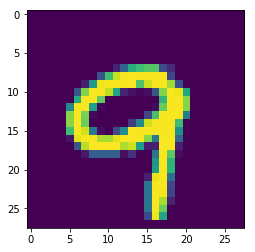

In [68]:
sample_row=129
sample_row=df.iloc[sample_row,:-1]
transformed_row=sample_row.values.reshape(28,28)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(transformed_row)
plt.show();

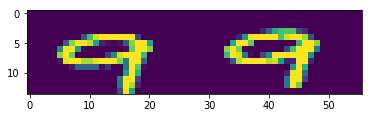

In [122]:
sample_row=129
sample_row=df.iloc[sample_row,:-1]
transformed_row=sample_row.values.reshape(14,56)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(transformed_row)
plt.show();

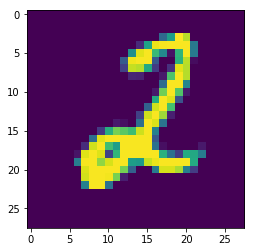

In [69]:
sample_row=551
sample_row=df.iloc[sample_row,:-1]
transformed_row=sample_row.values.reshape(28,28)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(transformed_row)
plt.show();